**ИССЛЕДОВАНИЕ ДАННЫХ О РОССИЙСКОМ КИНОПРОКАТЕ**

✅ **Описание проекта:**

Заказчик этого исследования — Министерство культуры Российской Федерации. 

Входные данные — архив данных, опубликованный на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.
    
✅ **Цель исследования:**
    
Необходимо провести исследовательский анализ данных о российском кинопрокате и выявить текущие тренды.
Также необходимо ответить на вопрос, насколько зрителю интересны фильмы, которые получили государственную поддержку.
    
✅ **Описание данных:**

Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 

* `title` — название фильма;
* `puNumber` — номер прокатного удостоверения;
* `show_start_date` — дата премьеры фильма;
* `type` — тип фильма;
* `film_studio` — студия-производитель;
* `production_country` — страна-производитель;
* `director` — режиссёр;
* `producer` — продюсер;
* `age_restriction` — возрастная категория;
* `refundable_support` — объём возвратных средств государственной поддержки;
* `nonrefundable_support` — объём невозвратных средств государственной поддержки;
* `financing_source` — источник государственного финансирования;
* `budget` — общий бюджет фильма;
* `ratings` — рейтинг фильма на КиноПоиске;
* `genres` — жанр фильма.

Столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.

* `puNumber` — номер прокатного удостоверения;
* `box_office` — сборы в рублях.

✅ **План работы:**
    
1. Изучаем общую информацию о данных;
2. Делаем предобработку данных;
3. Определяем текущие тренды;
4. Отвечаем на вопрос, насколько зрителю интересны фильмы, которые получили государственную поддержку;
4. Делаем общий вывод.
    


##  Откроем файлы с данными и объединим их в один датафрейм.

### Открытие файлов и изучение данных

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pylab as plt

# зададим формат отображения вещественных чисел в Pandas
pd.set_option('display.float_format', '{:,.2f}'.format)

# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

# Сброс ограничений на число строк
pd.set_option('display.max_rows', None)

# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

Откроем первый датасет:

In [2]:
df = pd.read_csv('/datasets/mkrf_movies.csv')
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
df['show_start_date'].min()

'2010-01-11T12:00:00.000Z'

In [4]:
df['show_start_date'].max()

'2019-12-30T12:00:00.000Z'

Откроем второй датасет: 

In [5]:
df_shows = pd.read_csv('/datasets/mkrf_shows.csv')
df_shows.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


Изучим общую информацию от датасетах: 

In [6]:
display('Общая информация о прокатных удостоверениях:')
display(df.info())
display('')
display('Общая информация о прокате в российских кинотеатрах:')
display(df_shows.info())

'Общая информация о прокатных удостоверениях:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

''

'Общая информация о прокате в российских кинотеатрах:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

**Вывод о данных и обнаруженных проблемах:**

В таблице `mkrf_movies` представлены данные о фильмах, выпущенных в **2010-2019** годах.  

В таблице `mkrf_movies` общее количество строк **7486**. Данные представлены в 15 столбцах типа float64(3) или object(12). 

В таблице `mkrf_shows` общее количество строк **3158**. Данные представлены в 2 столбцах типа int64(1) и float64(1).

Типы данных не соответствуют предполагаемым:
* `puNumber` — прокатное удостоверение, значение которого целочисленно, сейчас имеет значение типа object. Его нужно привести к формату int;
* `show_start_date` — дата начала проката в формате типа object. Его нужно привести к формату Datetime;
* `ratings` — значение рейтинга в формате типа object. Его нужно привести к формату float.

Количественные значения:
* В некоторых случаях значение сборов и финансирования равно 0. Необходимо проверить эти данные на наличие ошибок.
* Присутствуют пропуски в следующих столбцах: `film_studio`, `production_country`, `director, producer`, `refundable_support`, `nonrefundable_support`, `budget`, `financing source`, `ratings`, `genres`, `box office`. Обработаем пропуски в процессе исследования: заполним там, где это возможно, или удалим строки. 

### Объединение датасетов

Объединять датасеты будем в один датафрейм по столбцу `puNumber`.

В датасете `df` о прокатных удостоверениях столбец `puNumber` имеет тип данных `object`. В датасете `df_shows` о прокатных удостоверениях столбец `puNumber` имеет тип данных `int64`.

Приведем в датасете `df` данные в столбце `puNumber` к типу `int64`.
В связи с тем, что в столбце `puNumber` могут оказаться нецифровые символы, напишем функцию, которая находит такие записи: 

In [7]:
df[~df['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


В строке 804 есть пробелы, а в строке 1797 пропущено значение. 
Удалим пробелы и заменим пропущенное значение 0, чтобы не терять данные:

In [8]:
df.loc[804, 'puNumber'] = df.loc[804, 'puNumber'].strip()
df.loc[1797, 'puNumber'] = 0

Приведем строки к целым числам и проверим тип данных:

In [9]:
df['puNumber'] = pd.to_numeric(df['puNumber'])
df['puNumber'].dtype

dtype('int64')

Тип данных в столбце `puNumber`, по которому мы будем производить объединение датасетов, совпадает. 

Выведем размер таблицы до объединения, чтобы после объединения можно было сравнить размеры датафрейма:

In [10]:
df.shape

(7486, 15)

В таблице `df` до объединения 7486 строк и 15 столбцов.

Объединим нужные нам датасеты в один датафрейм, после чего удалим датасет `df_shows`, так как он нам больше не нужен: 

In [11]:
df = df.merge(df_shows, how='left')
del df_shows

Проверим, что объединение прошло успешно:

In [12]:
display(df.shape)
display(df.head(1))

(7486, 16)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN


Объединение прошло успешно! В таблицу `df` добавился новый столбец `box_office`.

## Предобработка данных

### Проверим типы данных

#### `show_start_date` — дата премьеры фильма;

Дата премьеры фильма хранится в строке вида `2012-08-24T12:00:00.000Z`. Приведем значение столбца к формату даты.

In [13]:
df['show_start_date'] = pd.to_datetime(df['show_start_date']).dt.date # преобразуем строки в даты и отбросим время
df['show_start_date'].head()

0    2015-11-27
1    2016-09-13
2    2016-10-10
3    2016-06-10
4    2015-07-29
Name: show_start_date, dtype: object

#### `ratings` — рейтинг фильма на КиноПоиске;

In [14]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Данные хранятся в строковом формате, хотя фактически являются цифрами. Также часть данных имеют проценты, при этом рейтинги фильмов на КиноПоиске обычно исчисляются в 10-бальной шкале. 

Уберем знак `%`, изменим тип данных на числовое значение и в числах, где ранее присутсвовал знак `%`, поставим точку. Например, если в строке содержится значение `83%`, на самом деле фильм имеет рейтинг `8.3`. Далее приведем все данные к числам.

In [15]:
df['ratings'] = df['ratings'].str.replace('%', '')

In [16]:
df['ratings'] = df['ratings'].astype('float')

In [17]:
df.loc[df['ratings'] >= 10, 'ratings'] = df['ratings'] / 10

In [18]:
# проверим результат
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

### Изучите пропуски в датафрейме

Посмотрим на количество пропущенных значений: 

In [19]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Изучим процентное соотношение пропущенных значений относительно общего количества данных:

In [20]:
ratio_skip = (df.isna().sum() / len(df)).round(3)
ratio_skip

title                   0.00
puNumber                0.00
show_start_date         0.00
type                    0.00
film_studio             0.00
production_country      0.00
director                0.00
producer                0.08
age_restriction         0.00
refundable_support      0.96
nonrefundable_support   0.96
budget                  0.96
financing_source        0.96
ratings                 0.13
genres                  0.13
box_office              0.58
dtype: float64

#### `film_studio` — студия-производитель;

Отсутствует меньше 1 процентра данных. Посмотрим на данные поближе:

In [21]:
df.loc[df['film_studio'].isna()].head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Нил Лабут, Бенжамин Грейсон, Крис Фоггин","Татьяна Келли, Роберта Мунро, Руперт Френд, Дон Бриджетвотер, Тим Хармс, Бенжамин Грейсон, Крис Кроучер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В данных строчках присутствует информация о фильмах. Следовательно, пропуски могли возникнуть впринципе из-за отсуствия студий. Заполним эти данные фразой "Без студии":

In [22]:
df['film_studio'] = df['film_studio'].fillna(value='Без студии')

#### `production_country` — страна-производитель;

Присуствуют пропуски всего в 2 строках. Посмотрим на них внимательнее: 

In [23]:
df.loc[df['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну просто фантазтика!""",111001216,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А.Зеленков, М.Сулейманова и др.","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","194,527.00"
4441,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,Без студии,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


Иная информация в данных строках по фильмам указана. Заполним пропуски значением "Без страны":

In [24]:
df['production_country'] = df['production_country'].fillna(value='Без страны')

#### `director` — режиссёр и `producer` — продюсер;

В столбце director отсутствует меньше 1% данных, а в столбце producer отсутствует 7% данных. Предположим, что если значение указано только в одном столбце, то этот человек исполнял роль режисера и продюсера одновременно. Если данных нет в обоих ячейках, заполним пропуски значением NaN.

In [25]:
df['director'] = df['director'].fillna(value=df['producer'])
df['producer'] = df['producer'].fillna(value=df['director'])
df['director'] = df['director'].fillna(value='NaN')
df['producer'] = df['producer'].fillna(value='NaN')

#### refundable_support, nonrefundable_support, budget

Пропуски в столбцах `refundable_support`, `nonrefundable_support`, `budget` составляют 95% от общей массы данных. Если данные не указаны, вероятно это коммерческий проект. Заполним пропуски 0. 

In [26]:
df['refundable_support'] = df['refundable_support'].fillna(value=0)
df['nonrefundable_support'] = df['nonrefundable_support'].fillna(value=0)
df['budget'] = df['budget'].fillna(value=0)

#### `financing_source` — источник государственного финансирования;

Отсуствует 95% данных. В данном столбце указаны данные только в случае наличия источника государственного финансирования. 
Вероятно, что остальные фильмы являются частным коммерческим проектом. Если наше предположение верно, заполним пропуски значением "Коммерческий":

In [27]:
df.loc[df['financing_source'].isna()].head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Е.Матвеев,«6+» - для детей старше 6 лет,0.00,0.00,0.00,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,0.00,NaN,6.80,"фантастика,боевик,триллер",NaN


In [28]:
df['financing_source'] = df['financing_source'].fillna(value='Коммерческий')

#### `ratings` — рейтинг фильма на КиноПоиске;

Отсутствует почти 13% данных. Заполнить эти пропуски мы сможем только значением NaN, так как значение рейтингов заполнить на основании имеющихся данных не получится.

In [29]:
df['ratings'] = df['ratings'].fillna(value='NaN')

#### `genres` — жанр фильма.

Отсутствует 13% данных. Посмотрим на строки с пропусками внимательнее: 

In [30]:
df.loc[df['genres'].isna()].head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДжи, Спайгласс Интертейнмент, Эмблин Интертейнмент, Рэд Вэгон Продакшнс",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон Де Люка, Гэри Барбер, Роджер Бирнбаум",«12+» - для детей старше 12 лет,0.00,0.00,0.00,Коммерческий,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов","А.Столпер, Б.Иванов",«6+» - для детей старше 6 лет,0.00,0.00,0.00,Коммерческий,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28,Художественный,"Чешское телевидение,Студия ""Три брата"" агентской фирмы ""К + К арт""",Чехия,Владимир Дрга,Владимир Дрга,«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Коммерческий,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,Б.Барнет,«12+» - для детей старше 12 лет,0.00,0.00,0.00,Коммерческий,NaN,NaN,NaN


Заполним пропуски значением NaN:

In [31]:
df['genres'] = df['genres'].fillna(value='NaN')

#### `box office` — сборы в рублях.

Отсутствует 57% данных. Данные о сборах взять неоткуда, заполним пропуски значением 0.

In [32]:
df['box_office'] = df['box_office'].fillna(value=0)

Еще раз проверим наличие пропусков в таблице:

In [33]:
df.isna().sum()

title                    0
puNumber                 0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
dtype: int64

### Изучим дубликаты в датафрейме

Посчитаем идентичные строки в таблице:

In [34]:
df.duplicated().sum()

0

Полных совпадений не найдено. 

Посчитаем общее количество уникальных значений по каждому столбцу:

In [35]:
df.nunique()

title                    6772
puNumber                 7484
show_start_date          1965
type                        8
film_studio              5491
production_country        951
director                 4817
producer                 5714
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            4
ratings                    85
genres                    743
box_office               2938
dtype: int64

Поищем фильмы, которые совпадают по полям названия, даты премьеры, типа, студии-производителя, страны-производителя и директора:

In [36]:
df[df.duplicated(subset=['title', 'show_start_date', 'type', 'film_studio', 'production_country', 'director'], keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1300,Эпидемия_,121025713,2013-10-07,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Групп, Ле Фильм дю Лендмен, Телевизио де Каталуниа",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,7.20,"драма,фантастика,триллер",0.00
1301,Эпидемия_,221035513,2013-10-07,Художественный,"Морена Фильм, Ребелион Террестр, А 3 Медиа Групп, Ле Фильм дю Лендмен, Телевизио де Каталуниа",Испания - Франция,"Алекс Пастор, Давид Пастор","Мерседес Гамеро, Альберто Марини, Педро Уриоль",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,7.20,"драма,фантастика,триллер",0.00
1475,Оторвы,121006514,2014-04-07,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Индион Интертейнмент Групп, Роуд Хад / Пут Эвэй Уэт Продакшнз",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,3.50,"комедия,приключения",0.00
1476,Оторвы,221013214,2014-04-07,Художественный,"Проминент Пикчерз, Ворлдвью Интертейнмент, Индион Интертейнмент Групп, Роуд Хад / Пут Эвэй Уэт Продакшнз",США,Кристофер Нельсон,"Молли Коннерс, Хезер Рэй",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,3.50,"комедия,приключения",0.00
2191,Последние пять лет.,221008115,2015-03-25,Художественный,"Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, Ш-К-Бум Рекордс",США,Ричард ЛаГравенес,"Джанет Бреннер, Лорен Версель, Курт Дойтч, Ричард ЛаГравенес",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,5.70,"мюзикл,драма,мелодрама",0.00
2192,Последние пять лет.,121005715,2015-03-25,Художественный,"Гранд Пикс Интертейнмент, Лаки Манки Пикчерз, Ш-К-Бум Рекордс",США,Ричард ЛаГравенес,"Джанет Бреннер, Лорен Версель, Курт Дойтч, Ричард ЛаГравенес",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,5.70,"мюзикл,драма,мелодрама","52,495.00"
2752,Пингвиненок Пороро: Большие гонки,224001915,2015-04-15,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, Би Ти Ви Каку Чилдренс Сателлит Ти Ви",Южная Корея - КНР,Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Коммерческий,5.20,"мультфильм,семейный,спорт","1,360.00"
2753,Пингвиненок Пороро: Большие гонки,124001915,2015-04-15,Анимационный,"Окон Студиос, Чина Филм, Симка Интертейнмент, Би Ти Ви Каку Чилдренс Сателлит Ти Ви",Южная Корея - КНР,Юнг Куюн Парк,"Иль Хо Ким, Михал Симка",«0+» - для любой зрительской аудитории,0.00,0.00,0.00,Коммерческий,5.20,"мультфильм,семейный,спорт","14,152,495.90"
3086,Анархисты,221003916,2016-02-03,Художественный,"24 Май Продюксьон, Франс 2 Синема",Франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,5.70,драма,0.00
3087,Анархисты,121002316,2016-02-03,Художественный,"24 Май Продюксьон, Франс 2 Синема",Франция,Эли Важеман,Лола Гэнс,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,5.70,драма,"332,371.00"


8 фильмов задублировалось. Они указаны под разными номерами прокатных удостоверений. 

Проверим, могут ли одно прокатное удостоверение выдавать разным фильмам: 

In [37]:
df.loc[df['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксьон, Марс Дистрибусьон, Канал +",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,7.00,"мелодрама,комедия",0.00
4639,Иоанна - женщина на папском престоле /По роману Донны Вулфольк Кросс/,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне Филис, Икури Филмз, Медуза Фильм, У Эф А Интернэшнл Филм энд Ти Ви Продуцион, Юниверсум Филм",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,7.60,"драма,мелодрама,история",0.00
5067,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Коммерческий,7.40,"комедия,криминал",0.00
5068,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи-Пи Интертейнмент, Баалтимор Спринг Крик Пикчерз Фейс, Трайбека",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,0.00,Коммерческий,6.80,"комедия,криминал",0.00


Одному фильму могли выдаваться несколько прокатных удостоверений. В рамках данного исследования номер прокатного удостоверения в большей степени используется как уникальный идентификатор. Поэтому удалим дубли и присвоим одному фильму - один прокатный номер. 

In [38]:
df.loc[(df['title'] == 'Иоанна - женщина на папском престоле /По роману Донны Вулфольк Кросс/') & (df['puNumber'] == 221154310), 'puNumber'] = 111111111

In [39]:
df.loc[(df['title'] == 'Анализируй то!') & (df['puNumber'] == 221054410), 'puNumber'] = 222222222

Проверим снова дубли:

In [40]:
df.loc[df['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


### Изучим категориальные значения

#### Уберем лишние пробелы внутри ячеек с категориальными значениями.

In [41]:
for column in ['director', 'producer', 'film_studio', 'production_country', 'genres', 'type', 'title', 'financing_source', 'age_restriction']:
    
    print('уникальные значения в', column)
    print('   было', df[column].nunique())
    
    df[column] = df[column].dropna().apply(lambda x: ', '.join([x.strip() for x in x.split(',')]))
    
    print('  стало', df[column].nunique())
    print()

уникальные значения в director
   было 4817
  стало 4806

уникальные значения в producer
   было 5714
  стало 5698

уникальные значения в film_studio
   было 5491
  стало 5462

уникальные значения в production_country
   было 951
  стало 934

уникальные значения в genres
   было 743
  стало 743

уникальные значения в type
   было 8
  стало 6

уникальные значения в title
   было 6772
  стало 6772

уникальные значения в financing_source
   было 4
  стало 4

уникальные значения в age_restriction
   было 5
  стало 5



#### Приведем все наименования к нижнему регистру для выявления неявных дубликатов

In [42]:
for column in ['director', 'producer', 'film_studio', 'production_country', 'genres', 'type', 'title', 'financing_source', 'age_restriction']:
    
    print('уникальные значения в', column)
    print('   было', df[column].nunique())
    
    df[column] = df[column].str.lower()
    
    print('  стало', df[column].nunique())
    print()

уникальные значения в director
   было 4806
  стало 4801

уникальные значения в producer
   было 5698
  стало 5689

уникальные значения в film_studio
   было 5462
  стало 5422

уникальные значения в production_country
   было 934
  стало 933

уникальные значения в genres
   было 743
  стало 743

уникальные значения в type
   было 6
  стало 6

уникальные значения в title
   было 6772
  стало 6762

уникальные значения в financing_source
   было 4
  стало 4

уникальные значения в age_restriction
   было 5
  стало 5



После обработки категориальных значений мы видим, что общей проблемой для большинства столбцов было наличие лишних пробелов (5 из 9 столбцов имели лишние пробелы), а также дублирование названий из-за наличия букв разного регистра (5 из 9 столбцов имели одинаковые наименования с разным регистром).

### Проверим количественные значения

#### `budget` — общий бюджет фильма;

В столбце `budget` содержатся данные, которые указаны только для тех фильмов, которые получили государственную поддержку. Рассмотрим их в разрезе соотношения с двумя другими объём возвратных средств государственной поддержки `refundable_support` и объём невозвратных средств государственной поддержки `nonrefundable_support`.

Проверим данные для фильмов, у которых бюджет меньше, чем сумма возвратных и невозвратных средств:

In [43]:
small_budget = df[df['budget'] < (df['refundable_support'] + df['nonrefundable_support'])]
small_budget

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19,художественный,"ооо киностудия ""сентябрь""",россия,а.зайцев,"о.гранина, а.зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"министерство культуры, фонд кино",6.60,мелодрама,"10,234,016.10"
2058,дуxless 2,111000415,2015-01-26,художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",россия,р.прыгунов,"п.ануров, ф.бондарчук, д.рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,фонд кино,6.60,драма,"446,163,511.00"
2472,воин (2015),111017315,2015-09-28,художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",россия,а.андрианов,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,фонд кино,7.80,"боевик, драма, криминал","196,572,438.40"
2532,бармен.,111009615,2015-05-26,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.штурманова,т.вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,фонд кино,6.20,"комедия, фэнтези","67,418,974.80"
2615,савва. сердце воина,114001715,2015-07-21,анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",россия,м.фадеев,а.чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,фонд кино,4.60,"мультфильм, приключения, фэнтези","184,487,551.40"
2684,тряпичный союз,111010215,2015-06-08,художественный,"ооо ""кинокомпания ""коктебель""",россия,м.местецкий,"р.борисевич, а.кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,фонд кино,6.30,"комедия, драма","1,957,738.51"
2788,срочно выйду замуж,111017115,2015-09-30,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,с чекалов,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,фонд кино,5.10,"комедия, мелодрама","72,937,783.20"
2874,помню - не помню!,111004916,2016-03-01,художественный,"ооо ""кинофирма""",россия,в.ровенский,"ооо ""кинофирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,министерство культуры,4.30,комедия,"15,362,931.43"
3047,любовь с ограничениями,111008216,2016-04-29,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.тюрин,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,фонд кино,6.30,"комедия, мелодрама","70,299,052.00"
3565,притяжение (2016),111018116,2016-12-16,художественный,"ооо ""водород 2011"", ооо ""арт пикчерс студия""",россия,ф.бондарчук,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,фонд кино,5.60,фантастика,"1,038,321,489.00"


У части фильмов, которых профинансировало госудасртво, указан бюджет 0. Звучит неправдоподобно. Заполним данные ячейки медианным значением от суммы господдержки. 

In [44]:
budget_median  = round(df.eval('(refundable_support + nonrefundable_support) / budget').median(), 2)
budget_median

0.61

Обычно процент государственной поддержки 61%. Заполним пропущенные значения в `budget`

In [45]:
df.loc[small_budget.index, 'budget'] = (df.loc[small_budget.index, 'refundable_support'] + df.loc[small_budget.index, 'nonrefundable_support']) / budget_median
df.loc[small_budget.index]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19,художественный,"ооо киностудия ""сентябрь""",россия,а.зайцев,"о.гранина, а.зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00","37,704,918.03","министерство культуры, фонд кино",6.60,мелодрама,"10,234,016.10"
2058,дуxless 2,111000415,2015-01-26,художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",россия,р.прыгунов,"п.ануров, ф.бондарчук, д.рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00","122,950,819.67",фонд кино,6.60,драма,"446,163,511.00"
2472,воин (2015),111017315,2015-09-28,художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",россия,а.андрианов,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00","131,147,540.98",фонд кино,7.80,"боевик, драма, криминал","196,572,438.40"
2532,бармен.,111009615,2015-05-26,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.штурманова,т.вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,"32,786,885.25",фонд кино,6.20,"комедия, фэнтези","67,418,974.80"
2615,савва. сердце воина,114001715,2015-07-21,анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",россия,м.фадеев,а.чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00","262,295,081.97",фонд кино,4.60,"мультфильм, приключения, фэнтези","184,487,551.40"
2684,тряпичный союз,111010215,2015-06-08,художественный,"ооо ""кинокомпания ""коктебель""",россия,м.местецкий,"р.борисевич, а.кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00","96,721,311.48",фонд кино,6.30,"комедия, драма","1,957,738.51"
2788,срочно выйду замуж,111017115,2015-09-30,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,с чекалов,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00","57,377,049.18",фонд кино,5.10,"комедия, мелодрама","72,937,783.20"
2874,помню - не помню!,111004916,2016-03-01,художественный,"ооо ""кинофирма""",россия,в.ровенский,"ооо ""кинофирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00","9,836,065.57",министерство культуры,4.30,комедия,"15,362,931.43"
3047,любовь с ограничениями,111008216,2016-04-29,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.тюрин,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00","114,754,098.36",фонд кино,6.30,"комедия, мелодрама","70,299,052.00"
3565,притяжение (2016),111018116,2016-12-16,художественный,"ооо ""водород 2011"", ооо ""арт пикчерс студия""",россия,ф.бондарчук,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00","409,836,065.57",фонд кино,5.60,фантастика,"1,038,321,489.00"


#### `refundable_support` — объём возвратных средств государственной поддержки;

In [46]:
df['refundable_support'].describe()

count         7,486.00
mean        526,182.21
std       5,781,108.09
min               0.00
25%               0.00
50%               0.00
75%               0.00
max     180,000,000.00
Name: refundable_support, dtype: float64

Минимальным значением является 0. Максимальная сумма возвратных средств 180 000 000 рублей. В среднем объем возвратных средств составляет 526 182 рублей.

#### `nonrefundable_support` — объём невозвратных средств государственной поддержки.

In [47]:
df['nonrefundable_support'].describe()

count         7,486.00
mean      2,172,280.03
std      16,148,935.45
min               0.00
25%               0.00
50%               0.00
75%               0.00
max     400,000,000.00
Name: nonrefundable_support, dtype: float64

Минимальным значением является 0. Максимальная сумма  невозвратных средств 400 000 000 рублей. В среднем объем невозвратных средств составляет 2 172 280 рублей.

#### `box_office` — сборы в рублях.

In [48]:
df['box_office'].describe()

count           7,486.00
mean       32,262,853.66
std       160,600,784.16
min                 0.00
25%                 0.00
50%                 0.00
75%         1,080,467.99
max     3,073,568,690.79
Name: box_office, dtype: float64

Подозрительным выгллядит минимальное значение 0. Как будто бы, если фильм вышел в прокат, то какую-то минимальную сумму он собрать должен.

Посмотрим более делально на фильмы без сборов: 

In [49]:
display(df.query('box_office == 0').head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,открытый простор,221048915,2015-11-27,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикчерз, тиг продакшнз",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,коммерческий,7.20,"боевик, драма, мелодрама",0.00
1,особо важное задание,111013716,2016-09-13,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,е.матвеев,«6+» - для детей старше 6 лет,0.00,0.00,0.00,коммерческий,6.60,"драма, военный",0.00
2,особо опасен,221038416,2016-10-10,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0.00,0.00,0.00,коммерческий,6.80,"фантастика, боевик, триллер",0.00
3,особо опасен,221026916,2016-06-10,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0.00,0.00,0.00,коммерческий,6.80,"фантастика, боевик, триллер",0.00
4,особо опасен,221030815,2015-07-29,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0.00,0.00,0.00,коммерческий,6.80,"фантастика, боевик, триллер",0.00


Посчитаем сколько всего строк, где не указаны сборы:

In [50]:
display(df.query('box_office == 0').count())

title                    4352
puNumber                 4352
show_start_date          4352
type                     4352
film_studio              4352
production_country       4352
director                 4352
producer                 4352
age_restriction          4352
refundable_support       4352
nonrefundable_support    4352
budget                   4352
financing_source         4352
ratings                  4352
genres                   4352
box_office               4352
dtype: int64

Кажется, что большая часть фильмов, где не указаны сборы - коммерческие. Соотвественно, отсутствие данных о сборах является аномалией.  

Проверим фильмы, которые были сняты при государственной поддержке, но по кассовым сборам у них 0:

In [51]:
df.query('refundable_support > 0 and nonrefundable_support > 0 and budget > 0 and box_office == 0' )


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7474,вторжение,111022519,2019-12-23,художественный,"ооо ""арт пикчерс студия"", ооо ""водород 2011""",россия,ф.бондарчук,"ф.бондарчук, м.врубель, а.андрющенко, д.рудовский",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","944,000,000.00",фонд кино,5.70,"фантастика, боевик",0.00
7478,(не)идеальный мужчина,111023119,2019-12-24,художественный,"ооо ""нон-стоп продакшн""",россия,м.бальчюнас (псевдоним м.вайсберг),"с.мелькумов, а.роднянский, м.вайсберг, р.минасбекян",«12+» - для детей старше 12 лет,"40,000,000.00","60,000,000.00","150,147,502.00",фонд кино,4.50,"комедия, фантастика, мелодрама",0.00


Последняя дата, за которую есть данные это декабрь 2019. Стоит предположить, что эти два фильма только вышли в прокат и пока не имеют информации о сборах.

У более половины фильмов не указаны сборы. Удялать такие аномальные значения не целесообразно. Оставим их в данных, но при дальнейшем изучении будем иметь в виду данную аномалию. 

### Добавим новые столбцы

#### Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [52]:
df['show_start_year'] = pd.DatetimeIndex(df['show_start_date']).year

#### Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [53]:
def get_main_value(row, sep = ','):
    return row.split(sep=sep)[0]

In [54]:
df['main_director'] = df['director'].apply(get_main_value)
df['main_genre'] = df['genres'].apply(get_main_value)

In [55]:
df.head(1)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre
0,открытый простор,221048915,2015-11-27,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикчерз, тиг продакшнз",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,0.00,0.00,0.00,коммерческий,7.20,"боевик, драма, мелодрама",0.00,2015,кевин костнер,боевик


#### Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [56]:
round(df.eval('(refundable_support + nonrefundable_support) / budget').median() * 100, 2)

61.0

Добавим столбец о доле господдержки для каждого фильма:

In [57]:
df['gov_support'] = round(df.eval('(refundable_support + nonrefundable_support) / budget') * 100, 2)

In [58]:
df.query('budget > 0').head(1)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,gov_support
1281,пока еще жива,111005313,2013-10-11,художественный,"ано содействия развитию кинематографии ""ангел-фильм"", ооо ""кинокомпания отражение""",россия,а.атанесян,"а.атанесян, м.бабаханов, р.бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",министерство культуры,8.10,"драма, мелодрама","365,353.60",2013,а.атанесян,драма,33.37


## Проведем исследовательский анализ данных


#### Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируем, как эта доля менялась по годам. Сделаем вывод о том, какой период полнее всего представлен в данных.

Создадим сводную таблицу `df_pivot`, которую заполним данными по годам:

- сколько фильмов вышло в прокат;
- суммой сборов в рублях;
- средним количеством сборов в рублях;
- медианой по сборам в рублях;
- сколько фильмов вышло за год(не прокат);
- процентом проката за каждый указанный год.

In [59]:
df_pivot = df.query('box_office > 0').pivot_table(index='show_start_year', values='box_office', aggfunc=['count', 'sum', 'mean', 'median'])
df_pivot = df_pivot.set_axis(['Вышло в прокат', 'Сумма', 'Среднее', 'Медиана'], axis='columns')
df_pivot['Фильмов за год'] = df.pivot_table(index='show_start_year', values='box_office', aggfunc='count')['box_office']
df_pivot['Процент проката'] = df_pivot['Вышло в прокат'] / df_pivot['Фильмов за год']  * 100
display(df_pivot.loc[:, ['Вышло в прокат', 'Фильмов за год', 'Процент проката']])

,Вышло в прокат,Фильмов за год,Процент проката
show_start_year,,,
2010,101,985,10.25
2011,109,622,17.52
2012,123,593,20.74
2013,179,630,28.41
2014,273,807,33.83
2015,462,705,65.53
2016,525,818,64.18
2017,357,505,70.69
2018,475,891,53.31


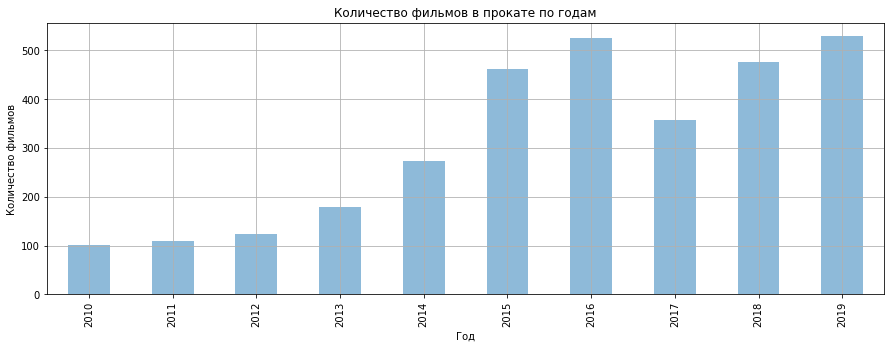

In [60]:
df_pivot.plot(title='Количество фильмов в прокате по годам', kind='bar', y='Вышло в прокат', figsize=(15, 5), grid=True, legend=False, alpha=0.5);
plt.ylabel('Количество фильмов')
plt.xlabel('Год')
plt.show()

За 10 лет в прокат стало выходить в пять раз больше фильмов. При этом в 2017 году наблюдается резкий спад, но к 2019 году количество фильмов снова вернулось к значениям 2016 года.  

Определим какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах:

In [61]:
round(df.query('box_office > 0')['box_office'].count() / df['box_office'].count() * 100, 2)

41.86

#### Изучим, как менялась динамика проката по годам.

Посмотрим на изменение суммы сборов в разрезе каждого отдельного года:

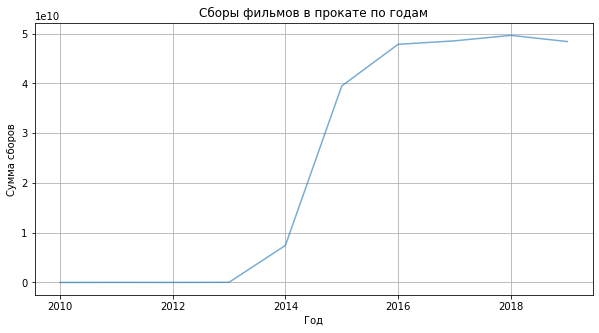

In [62]:
df_pivot.plot(title='Сборы фильмов в прокате по годам', kind='line', y='Сумма', figsize=(10, 5), legend=False, grid=True, alpha=0.6)
plt.ylabel('Сумма сборов')
plt.xlabel('Год')
plt.show()

In [63]:
df_pivot['Сумма'].idxmin()

2010

In [64]:
df_pivot['Сумма'].idxmax()

2018

Видим, что минимальные сборы были в 2010 году. Максимальные сборы были в 2018 году.

#### С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [65]:
df_pivot.loc[:, ['Среднее', 'Медиана']]

,Среднее,Медиана
show_start_year,,
2010,"24,046.08","1,710.00"
2011,"129,383.17","3,000.00"
2012,"56,548.15","6,220.00"
2013,"166,478.81","3,580.00"
2014,"27,270,885.93","20,400.00"
2015,"85,492,132.46","5,003,450.15"
2016,"91,173,904.27","3,915,041.02"
2017,"136,032,793.33","9,968,340.00"
2018,"104,565,059.23","8,891,102.21"


Для наглядности выведем медиану и среднее на график:

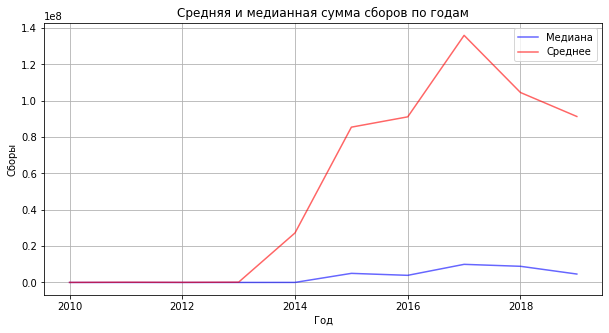

In [66]:
df_pivot.plot(title='Средняя и медианная сумма сборов по годам', kind='line', y=['Медиана', 'Среднее'], figsize=(10, 5), legend=True, grid=True, color=['blue','red'], alpha=0.6)
plt.ylabel('Сборы')
plt.xlabel('Год')
plt.show()

Судя по среднему значению, начиная с 2013 года сумма за сборы существенно увеличились. Падение произошло только с 2017 года. 

При этом судя по медианному значению перепад "температуры по больнице" был не настолько велик.

В разделе 2.5.4.нашего исследования мы выявили, что у более половины фильмов не указаны сборы. Мы не удалили такие аномальные значения, так как их было очень много и мы бы лишились половины данных. Однако, данная аномалия повлияла на среднее значение (оно слишком занижено).
Поэтому в данном случае целесообразнее всего доверять медиане. 

#### Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года?

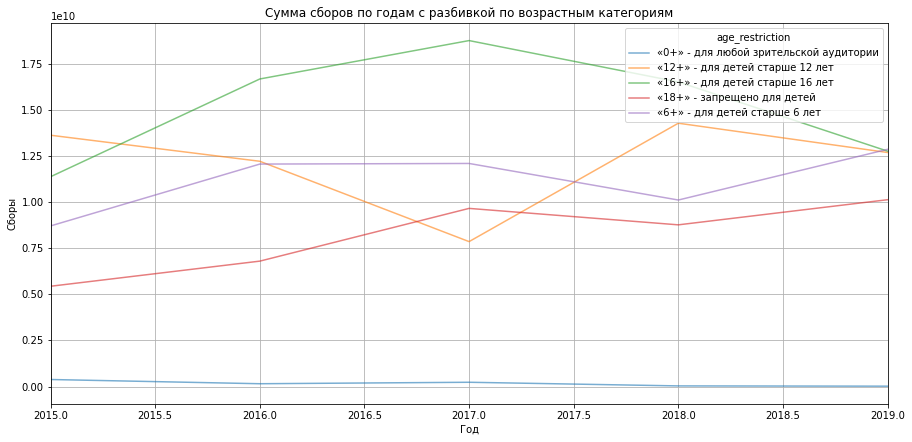

In [67]:
df_check_age = df.query('box_office > 0').pivot_table(index='show_start_year', columns='age_restriction', values='box_office', aggfunc='sum')

(df_check_age.plot(title='Сумма сборов по годам с разбивкой по возрастным категориям', kind='line', xlim=[2015, 2019], figsize=(15, 7), legend=True, grid=True, alpha=0.6))
plt.ylabel('Сборы')
plt.xlabel('Год')
plt.show()

Изучим суммарные данные по категориям и подведем итог в строке `Итого`.

In [68]:
total = df_check_age.sum(axis=0)
df_check_age = df_check_age.append(pd.Series(total, name='Итого'))
df_check_age

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
show_start_year,,,,,
2010,"1,887,611.00","120,146.00","366,512.00","54,385.00",NaN
2011,"13,499,871.00","219,891.00","381,513.00","1,040.00",450.00
2012,"2,266,483.00","108,734.00","3,254,216.00","182,580.00","1,143,410.00"
2013,"2,710,302.50","20,910,336.50","658,069.60","5,161,245.60","359,752.00"
2014,"375,562,258.20","2,584,782,324.00","544,280,086.70","2,209,712,746.90","1,730,614,443.40"
2015,"379,054,578.37","13,616,082,008.91","11,368,120,870.27","5,432,308,367.44","8,701,799,371.41"
2016,"150,228,848.67","12,204,446,524.39","16,664,548,541.74","6,793,929,818.87","12,053,146,008.24"
2017,"229,598,930.00","7,851,427,660.67","18,745,042,900.06","9,651,495,581.02","12,086,142,145.76"
2018,"32,449,002.11","14,267,291,660.69","16,503,602,346.96","8,760,085,501.15","10,104,974,623.41"


Лидерами по итоговым сборам яввляются фильмы 16+. После 2017 года сборы по фильмам 16+ упали по сравнению с предыдущими годами, но по прежнему являлись лидерами по сравнению с остальными фильмами. 

С 2018 года стали набирать популярность фильмы 12+.

В 2019 году первое место по сборам заняли фильмы «6+», что может свидетельствовать о том, что вкусы и предпочтения зрителей меняются со временем.

Смена интересов зрителей к фильмам разной возрастной категории может быть связано с текущией в определенном году тенденцией. 
Так, например, до 2018 года на первом месте у зретелей была тенденция к развлечениям и путешествиям, а с 2018 зрители стали тяготеть к семейным ценностям и приоритетам, таким как укрепление семьи и отношений между родителями и детьми. Поэтому на первое место вышли фильмы 6+. Кроме того, существенное влияние на выбор зрителей может оказывать качество фильмов и их сценарий, а также качество продвижения и рекламы фильмов.

## Исследуем фильмы, которые получили государственную поддержку

Посмотрим на фильмы, которые получали государственную поддержку через параметр сборов, сколько собрано в целом, на какие фильмы, на какие жанры, а также проверим рейтинги у фильмов с государственной поддержкой и без нее.

Посмотрим на информацию о общих сборах.

In [69]:
df['box_office'].mean()

32262853.657110605

In [70]:
df['box_office'].median()

0.0

In [71]:
df['box_office'].min()

0.0

In [72]:
df['box_office'].max()

3073568690.79

Посмотрим подробнее на параметр сборов исключив из него отсутствующие данные в представлении гистограммы.

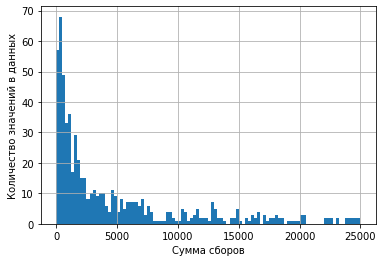

In [73]:
df.query('box_office > 0')['box_office'].hist(bins=100, range=(0,25000));
plt.ylabel('Количество значений в данных')
plt.xlabel('Сумма сборов');

Построим ящик с усами, чтобы понять, сколько собирали фильмы чаще всего.

<AxesSubplot:>

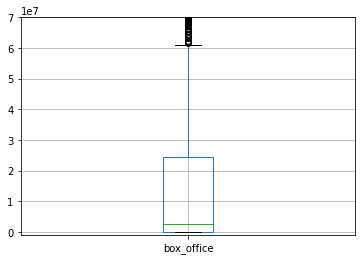

In [74]:
non_nul = df.query('box_office > 0')
box = non_nul[['box_office', 'title']]
plt.ylim(-1000000, 70000000)
box.boxplot()

Видим, что большая часть значений лежит в диапазоне практически от 0 до 24 000 000 рублей.

Верхний ус заканчивается около 70 000 000. Более высокие значения рисуются отдельными точками.
Значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (зелёная линия) не стремится к длинному хвосту высоких значений, а лежит практически около 0.

Сборов в крупных суммах было очень немного. Судя по графиках преобладают сборы до 500 000 рублей.

Посмотрим на количество снятых при поддержке Министерства культуры или Фонда кино фильмов, отдельно для тех, у которых есть сборы, а отдельно без сборов.

In [75]:
list_sponsor = ['Министерство культуры', 'Фонд кино', 'Министерство культуры, Фонд кино']
display('Проекты сняты при поддержке Министерства культуры или Фонда кино без информации о сборах', df.query('budget != 0 and box_office == 0  and financing_source in @list_sponsor' )['title'].count())
display('Проекты сняты при поддержке Министерства культуры или Фонда кино с информацией о сборах', df.query('budget != 0 and box_office != 0 and financing_source in @list_sponsor' )['title'].count())

'Проекты сняты при поддержке Министерства культуры или Фонда кино без информации о сборах'

0

'Проекты сняты при поддержке Министерства культуры или Фонда кино с информацией о сборах'

0

In [76]:
median_budget = df.query('budget != 0')['budget'].median()
display(f'Медиана по выделяемому бюджету на фильмы руб.: {median_budget}', )

'Медиана по выделяемому бюджету на фильмы руб.: 74592550.0'

Очень много сумм сборов относительно скромные. Так как медианная сумма по размеру бюджета 74 592 550 рублей, посмотрим на количество фильмов, которые ниже этой границы по сборам.

In [77]:
count_film = df.query('budget != 0 and box_office < 74592550 and financing_source in @list_sponsor')['box_office'].sort_values(ascending=True).nunique()
display(f'Сборов до медианы по выделяемому бюджету: {count_film}', )

'Сборов до медианы по выделяемому бюджету: 0'

Фильмов, которые сняты при поддержке Министерства культуры или Фонда кино и получили сборов меньше медианного значения выделяемого бюджета — 221, это 69.5% от общей информации о сборах, которая у нас есть. Судя по всему доходы у выпускаемых фильмов, которые были на господдержке были очень скромные.

Чтобы разобраться со сборами и получить как можно больше информации об этом параметре, обратимся к распределению по категориям и вычислению процентов от общего количества данных, а затем посмотрим на доходы в разрезе по типам фильмов.

Сборы можно поделить на пять основных условных категорий:

- провал - сборы фильма не покрыли даже бюджет производства;
- убыток - сборы фильма покрыли только бюджет производства, но не принесли прибыли;
- средний успех - сборы фильма превысили бюджет производства, но не достигли уровня ожидаемой прибыли;
- хороший успех - сборы фильма превысили бюджет производства и достигли или превысили ожидаемую прибыль;
- кассовый успех - сборы фильма значительно превысили бюджет производства и принесли огромную прибыль.

Для категоризации поделим цены с помощью метода .quantile() и шага 20%. цена:
    
- провал: 0-20%
- убыток: 21-40%
- средний успех: 41-60%
- хороший успех: 61-80%
- кассовый успех: 81-100%

In [78]:
df.query('budget != 0 and box_office != 0 and financing_source in @list_sponsor')['box_office'].quantile([.20, .40, .60, .80])

0.20   NaN
0.40   NaN
0.60   NaN
0.80   NaN
Name: box_office, dtype: float64

In [79]:
bins = [0, 725984.10, 5789606.54, 37480267.37, 150860738.64, float('inf')]
labels = ['провал', 'убыток', 'средний успех', 'хороший успех', 'кассовый успех']
df['category'] = pd.cut(df['box_office'], bins=bins, labels=labels)

In [80]:
def sort_category(new_df, index, column):
    sort_category_df = (new_df.pivot_table(index=index, values=column, aggfunc='count').sort_values(by=column, ascending = False))
    sort_category_df['percent'] = (sort_category_df[column] / sort_category_df[column].sum()) * 100  
    sort_category_df = sort_category_df.set_axis(['Количество в ' + column, 'Процент от общего'], axis='columns')
    return sort_category_df

Посмотрим на процент по каждой категории:

In [81]:
sort_category(df, 'category', 'box_office')

,Количество в box_office,Процент от общего
category,,
провал,1131,36.09
убыток,785,25.05
средний успех,544,17.36
кассовый успех,355,11.33
хороший успех,319,10.18


Доля провальных и убыточных фильмов крайне велика, суммарно это 61.14% от всех количества всех данных о сборах.

Построим диаграмму в зависимости от определенных ранее категорий и типов, которые указаны в данных.

In [82]:
def counts_hist(new_df, columns, kind):
    new_df['category'] = new_df['category'].astype(str)
    counts = (new_df.groupby('type')[columns].value_counts()).to_frame().rename(columns={columns: 'count'}).reset_index()
    (pd.pivot_table(counts, values='count', index='type', columns=columns, fill_value=0)).plot(kind=kind, grid=True, figsize=(15, 5), legend=True);
    plt.ylabel('Количество значений в данных')
    plt.xlabel('Типы фильмов')

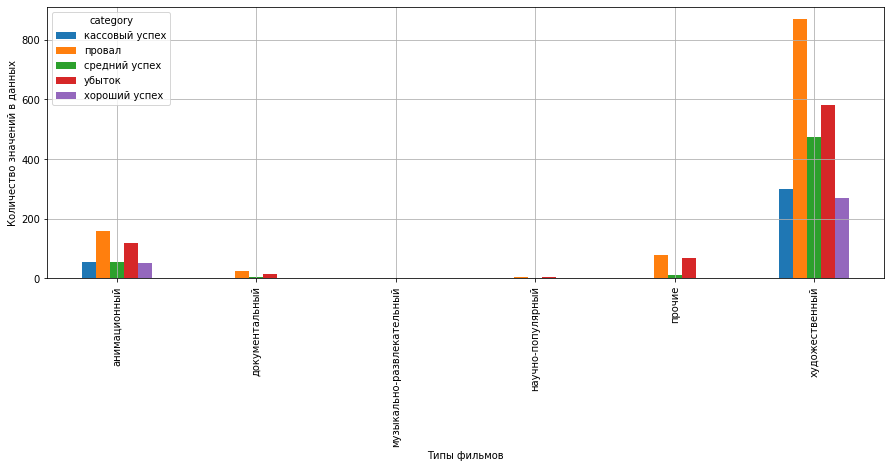

In [83]:
counts_hist(df, 'category', 'bar')

Больше всего в российских кинотеатрах было художественных фильмов, которые провалились в прокате. Анимационные фильмы также преимущественно были провальными по сборам.

## Общий вывод

В рамках настоящего исследования была проведена предварительная обработка данных — устранены пропуски и аномальные значения. 

Киноиндустрия является одной из наиболее динамичных отраслей. С 2010 по 2019 годы отрасль продемонстрировала значительный рост в производстве и количестве выходящих фильмов, а также в затратах на их производство. В частности, количество фильмов, которые выходили в прокат, увеличилось примерно в 5 раз, и затраты на производство кинолент существенно выросли.

Начиная с 2010 года был заметен рост количества фильмов, которым выдавались прокатные удостоверения. Однако, в 2017 году произошел резкий спад, который был связан с некоторыми проблемами внутри отрасли, в том числе с качеством фильмов и низкими сборами. К 2019 году значения количества выходящих фильмов и затрат на их производство вернулись к уровню 2016 года.

Спад по количеству выдаваемых прокатных удостоверений и уменьшению сборов в России в 2017 и 2018 годах можно связать с несколькими факторами.

Во-первых, на этот период пришелся скачок инфляции, что привело к росту цен на билеты в кинотеатрах. Это могло снизить спрос на кино и привести к сокращению выдачи прокатных удостоверений.
Во-вторых, в 2017 году был принят закон, который вводил новые правила выдачи прокатных удостоверений и требовал большей прозрачности в работе кинокомпаний. Это могло привести к снижению количества выдаваемых удостоверений в связи с изменением условий работы.
В-третьих, в этот период происходили изменения в налоговом законодательстве, которые могли повлиять на финансовую устойчивость кинокомпаний.

В течение трех лет подряд c 2016 по 2018 фильмы «16+» были лидерами по сборам в кинотеатрах, тогда как другие категории испытывали спад или не очень заметные изменения. Однако в 2019 году первое место по сборам заняли фильмы «6+» с небольшим отрывом. Вероятно, это связано с тем, что фильмы «16+» после пика в 2017 году начали терять аудиторию, возможно, из-за перенасыщения рынка. Кроме того, начиная с 2017 года, популярность набирают фильмы «12+», которые частично делят сегмент аудитории с фильмами «16+», что также могло привести к снижению интереса к фильмам в этой категории. Из анализа данных о фильмах, выпущенных в российский прокат с 2010 по 2019 год, следует, что большинство художественных фильмов не смотря на то, что занимали лидирующую позицию по прокатам, не смогли окупить свои бюджеты, а многие анимационные фильмы также оказались провальными. 

Однако, данные также показывают, что фильмы, снятые при государственной поддержке, не всегда показывают высокие результаты. 